# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Разработка скважин

Данный проект направлен на изучение 3х регионов со скважинами. Задача найти регион, где 200 скважин будут приносить прибыльъ
В проекте есть несколько показателей, наш основной показатель, прибыль.

## Загрузка и подготовка данных

Грузим необходимые библиотеки.

In [20]:
import pandas as pd
from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder 
import numpy as np

random = 12345

Грузим данные

In [21]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
print(data_0.head())
print(data_0['product'].sum())
print(data_0['product'].mean())
print(data_0['product'].median())
print()
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
print(data_1.head())
print(data_1['product'].sum())
print(data_1['product'].mean())
print(data_1['product'].median())
print()
data_2 = pd.read_csv('/datasets/geo_data_2.csv')
print(data_2.head())
print(data_2['product'].sum())
print(data_2['product'].mean())
print(data_2['product'].median())
print()

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
9250000.000000002
92.50000000000001
91.84997204396296

      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
6882500.000000002
68.82500000000002
57.08562464628662

      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0

Проверка данных

In [22]:
print(data_0.shape)
data_0 = data_0.drop_duplicates()
print(data_0.shape)
print()
print(data_1.shape)
data_1 = data_1.drop_duplicates()
print(data_1.shape)
print()
print(data_2.shape)
data_2 = data_2.drop_duplicates()
print(data_2.shape)
print()

(100000, 5)
(100000, 5)

(100000, 5)
(100000, 5)

(100000, 5)
(100000, 5)



Так как в нашей задачи индекс такое же уникальное название шахты, то опустим названия, для дальнейшей работы модели.

In [23]:
data_0 = data_0.sort_values(by = 'product', ascending = False).drop('id', axis= 1)
print(data_0.head())
print(data_0.shape)
print()
data_1 = data_1.sort_values(by = 'product', ascending = False).drop('id', axis= 1)
print(data_1.head())
print(data_1.shape)
print()
data_2 = data_2.sort_values(by = 'product', ascending = False).drop('id', axis= 1)
print(data_2.head())
print(data_2.shape)

             f0        f1        f2     product
8826   1.797736  0.098212  6.148260  185.364347
99818  0.518445 -0.412790  4.951916  185.362690
94175  0.351428 -0.400244  7.227618  185.355615
1925   0.624430 -0.469312  5.753677  185.354980
45291  1.758787 -0.395038  6.719085  185.352015
(100000, 4)

             f0         f1        f2     product
53864  2.901352  -3.475398  5.001393  137.945408
97083 -4.030430 -14.020643  5.009571  137.945408
88340 -3.373117  -9.227661  4.994369  137.945408
64879 -5.360281  -2.388204  5.001439  137.945408
7288  -8.058661  -2.244840  5.000753  137.945408
(100000, 4)

             f0        f1        f2     product
79705 -2.747914  1.555227  3.342182  190.029838
93444  3.026506  1.344623  8.891243  190.013589
35099  2.848844 -1.701996  9.437101  190.011722
21943 -2.500091  2.024392  6.291513  190.010982
37870 -0.686667 -3.219452  5.963290  190.010029
(100000, 4)


Проверим какая корреляция между нашими данными. 

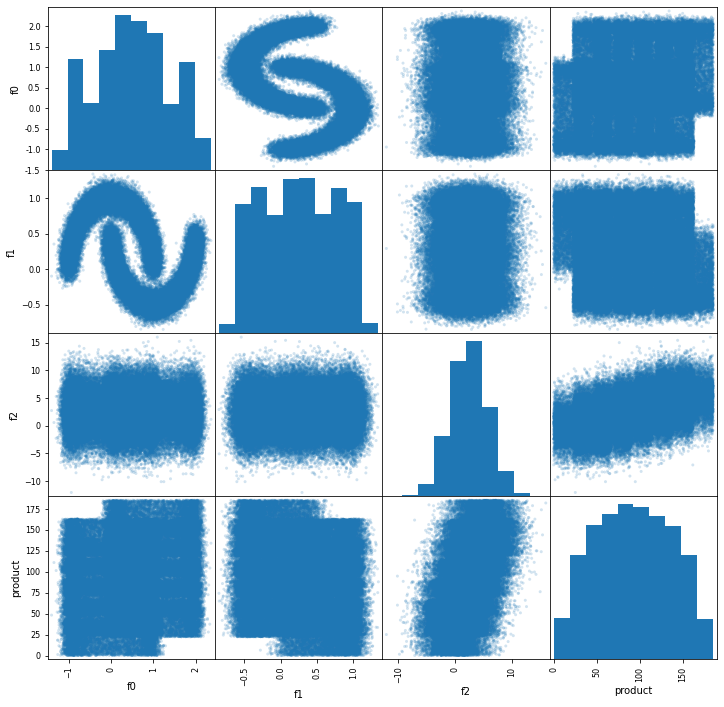

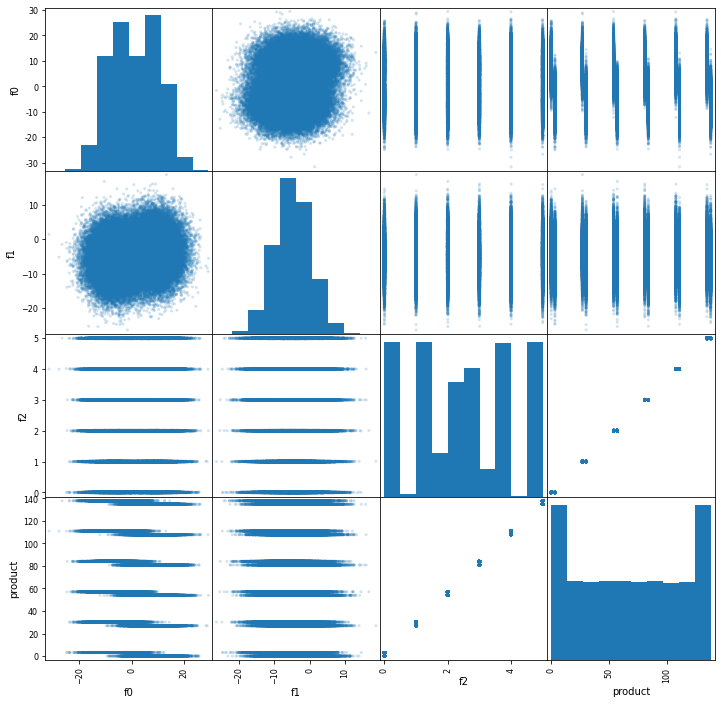

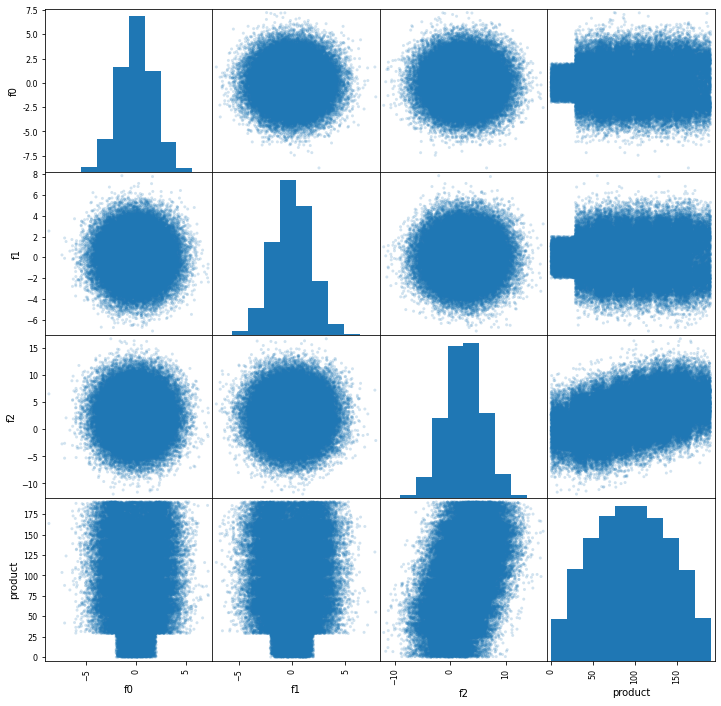

In [24]:
pd.plotting.scatter_matrix(data_0, alpha=0.2, figsize= (12.0, 12.0));
print()
pd.plotting.scatter_matrix(data_1, alpha=0.2, figsize= (12.0, 12.0));
print()
pd.plotting.scatter_matrix(data_2, alpha=0.2, figsize= (12.0, 12.0));

Проверим, подходят ли точки условию задания

In [25]:
10000000000/200/450000

111.11111111111111

111 - это минимальное значение, при котором выборка будет окупаться в 0. 
Посмотрим минимальные значения в выборках


## Обучение и проверка модели

In [26]:
features_0 = data_0.drop(['product'], axis=1)
target_0 = data_0['product']

features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
  features_0, target_0, test_size=0.25, random_state=random) 

model =  LinearRegression()
model.fit(features_train_0, target_train_0) 
predictions_valid_0 = model.predict(features_valid_0) 

result = mean_squared_error(target_valid_0, predictions_valid_0)**0.5 
print(predictions_valid_0.mean())
print("RMSE модели линейной регрессии на валидационной выборке:", result)


92.51298876770511
RMSE модели линейной регрессии на валидационной выборке: 37.710792440207165


Средняя ошибка 37.7 

In [27]:
features_1 = data_1.drop(['product'], axis=1)
target_1 = data_1['product']

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
  features_1, target_1, test_size=0.25, random_state=random) 

model =  LinearRegression()
model.fit(features_train_1, target_train_1) 
predictions_valid_1 = model.predict(features_valid_1) 

result = mean_squared_error(target_valid_1, predictions_valid_1)**0.5 
print(predictions_valid_1.mean())
print("RMSE модели линейной регрессии на валидационной выборке:", result)

68.63674116435672
RMSE модели линейной регрессии на валидационной выборке: 0.8927793585785007


Средняя ошибка 0.89

In [28]:
features_2 = data_2.drop(['product'], axis=1)
target_2 = data_2['product']

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
  features_2, target_2, test_size=0.25, random_state=random) 

model =  LinearRegression()
model.fit(features_train_2, target_train_2) 
predictions_valid_2 = model.predict(features_valid_2) 

result = mean_squared_error(target_valid_2, predictions_valid_2)**0.5 
print(predictions_valid_2.mean())
print("RMSE модели линейной регрессии на валидационной выборке:", result)

94.92931538300029
RMSE модели линейной регрессии на валидационной выборке: 39.855086497950055


Средняя ошибка 39.85

## Расчёт прибыли и рисков 

In [29]:
10000000000/200/450000

111.11111111111111

111 - это минимальное значение, при котором выборка будет окупаться в 0. 
Посмотрим минимальные значения в выборках


In [30]:
print(predictions_valid_0.mean())
print(predictions_valid_1.mean())
print(predictions_valid_2.mean())


92.51298876770511
68.63674116435672
94.92931538300029


4. Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

In [31]:
random = np.random.RandomState(12345)

In [32]:
predictions_valid_0 = pd.Series(predictions_valid_0, index = target_valid_0.index)
predictions_valid_1 = pd.Series(predictions_valid_1, index = target_valid_1.index)
predictions_valid_2 = pd.Series(predictions_valid_2, index = target_valid_2.index)



Привязываем индексы

In [33]:
budget = 10000000000
price = 450000
total_fields = 500
n_fields = 200
alpha = 0.95

def profit(target,prediction):
    df_tmp = pd.concat([target,prediction], axis = 1)
    df_tmp.columns = ('target','prediction')
    df_tmp = df_tmp.sort_values(by= 'prediction',ascending = False).head(200)
    return df_tmp['target'].sum()*price-budget


Прописываем формулу расчета

In [34]:
bootstrap_samples = 1000

def x(x):
    return x<0
 
def bootstrap_revenue(target, prediction):
    revenue_bootstrap = []
    for i in range(1000):
        prediction_subsample = pd.Series(prediction).sample(n=500, replace = True, random_state = random)
        target_subsample = pd.Series(target, index=prediction_subsample.index)
        revenue_bootstrap.append(profit(target_subsample, prediction_subsample))
    revenue_bootstrap = pd.Series(revenue_bootstrap)
    revenue_bootstrap_mean = revenue_bootstrap.mean()
    upper = revenue_bootstrap.quantile(0.975)
    lower = revenue_bootstrap.quantile(0.025)
    confidence_interval_mean= st.t.interval(alpha, len(revenue_bootstrap)-1,loc=revenue_bootstrap.mean(), 
                                       scale=revenue_bootstrap.sem())
    confidence_interval= st.norm.interval(alpha,loc=revenue_bootstrap.mean(), scale=revenue_bootstrap.sem())
    
    risk = sum(x(revenue_bootstrap) for revenue_bootstrap in revenue_bootstrap)/ revenue_bootstrap.count()
    
    return revenue_bootstrap_mean, lower, risk, upper,confidence_interval, confidence_interval_mean

revenue_bootstrap_mean, lower, risk, upper,confidence_interval, confidence_interval_mean = bootstrap_revenue(target_valid_0, predictions_valid_0)

print("Средний доход:", revenue_bootstrap_mean)
print("Топ:", upper)
print("Мин:", lower)
print("Доверительный интервал:", confidence_interval)
print("Доверительный интервал среднего значения:", confidence_interval_mean)
print("риск:", risk)



Средний доход: 379762051.5778888
Топ: 862222423.6732368
Мин: -125645274.4598669
Доверительный интервал: (363859662.71424174, 395664440.44153583)
Доверительный интервал среднего значения: (363840372.78973264, 395683730.36604494)
риск: 0.076


Расчитываем риск. Риск 7,6 % Средний доход 0.37 млд

In [35]:
revenue_bootstrap_mean, lower, risk, upper,confidence_interval, confidence_interval_mean = bootstrap_revenue(target_valid_1, predictions_valid_1)

print("Средний доход:", revenue_bootstrap_mean)
print("Топ:", upper)
print("Мин:", lower)
print("Доверительный интервал:", confidence_interval)
print("Доверительный интервал среднего значения:", confidence_interval_mean)
print("риск:", risk)


Средний доход: 389936697.3216592
Топ: 757521788.079141
Мин: -11238604.73049368
Доверительный интервал: (377657544.85079265, 402215849.79252577)
Доверительный интервал среднего значения: (377642649.9864908, 402230744.6568276)
риск: 0.029


Расчитываем риск. Риск 2,9% Средний доход 0.38 млд

In [36]:
revenue_bootstrap_mean, lower, risk, upper,confidence_interval, confidence_interval_mean = bootstrap_revenue(target_valid_2, predictions_valid_2)

print("Средний доход:", revenue_bootstrap_mean)
print("Топ:", upper)
print("Мин:", lower)
print("Доверительный интервал:", confidence_interval)
print("Доверительный интервал среднего значения:", confidence_interval_mean)
print("риск:", risk)

Средний доход: 347487449.6973643
Топ: 844286509.0204898
Мин: -168257860.97001377
Доверительный интервал: (331342592.4279479, 363632306.96678066)
Доверительный интервал среднего значения: (331323008.3842795, 363651891.01044905)
риск: 0.098


Расчитываем риск. Риск 9,8%, так как минимум интервала выше порога. Средний доход 0.34 млд

5. Посчитайте риски и прибыль для каждого региона:


Из всех тестов наиболее привлекательный регион номер 1. В нем наиболее низкий риск - 2,9% Хоть он и не проходит порог в 2.5%